# Lista 2 - Processamento Digital de Imagens
Dupla: João Pedro Maduro Menezes e Mariana Givisiez Mendes


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

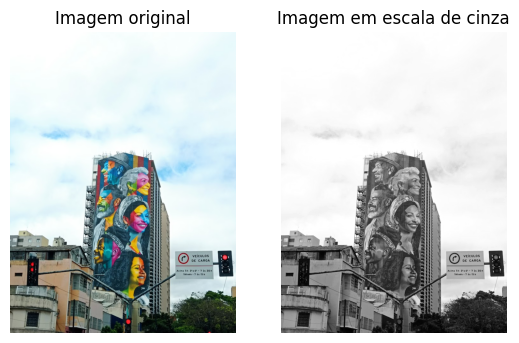

In [32]:
# Leitura de uma imagem colorida
foto = cv2.imread('img/kafka.jpg')

# Exibição da imagem original
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(cv2.cvtColor(foto, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Conversão RGB para Grayscale
R = foto[:,:,0]  # matriz correspondente à componente RED
G = foto[:,:,1]  # matriz correspondente à componente GREEN
B = foto[:,:,2]  # matriz correspondente à componente BLUE

grayscale_img = 0.299 * R + 0.587 * G + 0.114 * B

# Exibição da imagem em escala de cinza
plt.subplot(1,2,2)
plt.title('Imagem em escala de cinza')
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.show()

## Exercício 7
7. Para imagens em tons de cinza de sua base de imagens <br>
A) Mostre a imagem original e seu histograma correspondente. Implemente uma 
função que realize a equalização de histograma, mostrando o “histograma equalizado” 
e a imagem processada <br>
B) Comente os resultados, fazendo uma breve “crítica” sobre o processamento. Use 
parâmetros estatísticos calculados a partir dos histogramas para discutir

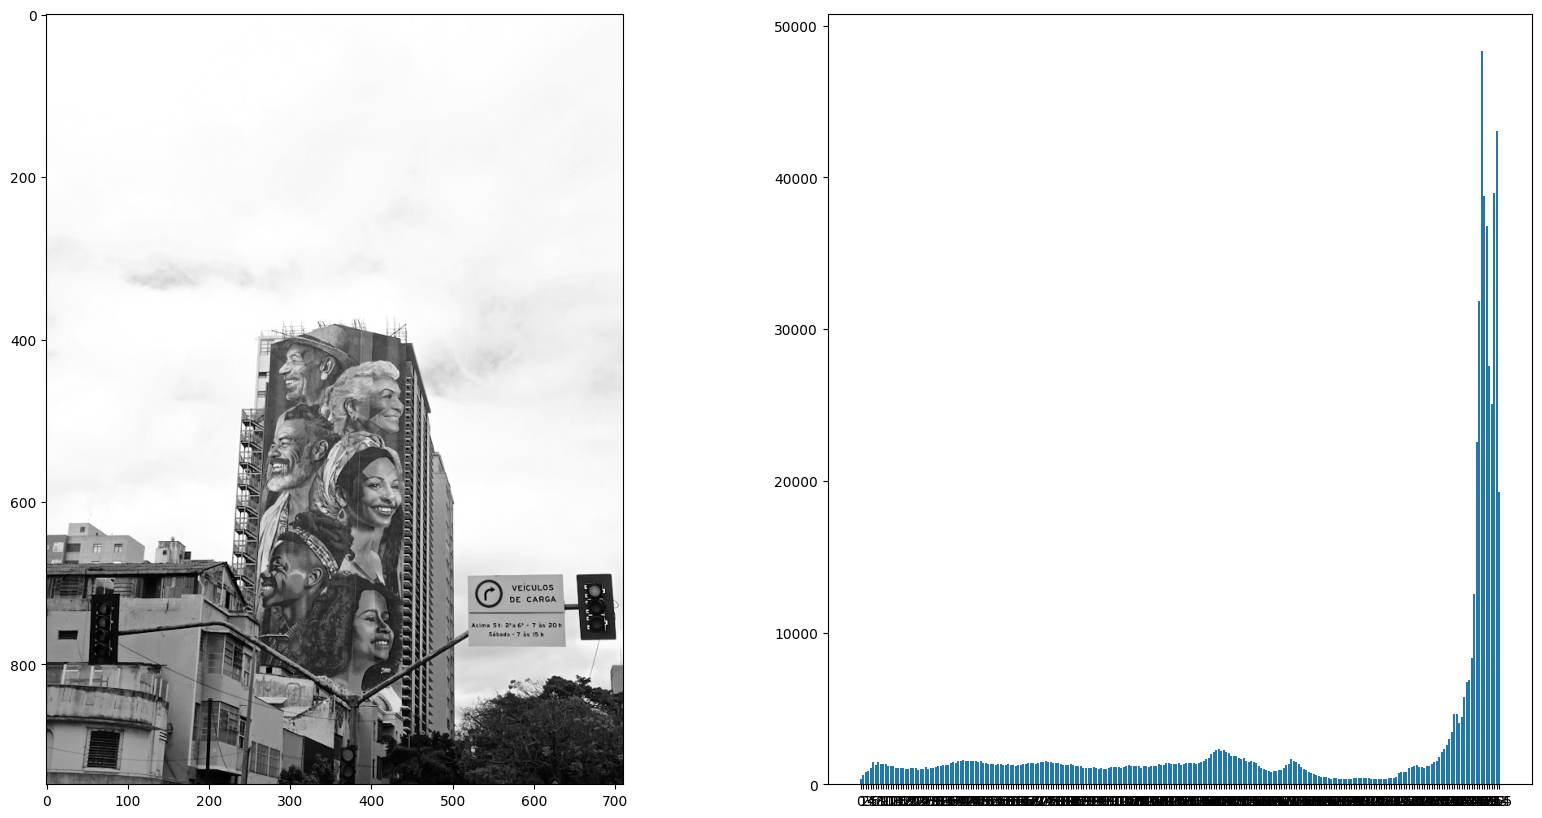

In [33]:
# Função para instanciar o histograma
def instantiate_histogram():    
    hist_array= []
    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)
    
    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)} 
    return hist_dct

# Função para contar a quantidade de valores de intensidade
def count_intensity_values(hist, img):
    for row in img:
        for column in row:
            hist[str(int(column))] = hist[str(int(column))] + 1
     
    return hist

# Função para plotar o histograma
def plot_hist(hist, image):
    figure, axarr = plt.subplots(1,2, figsize=(20, 10))
    axarr[0].imshow(image, cmap='gray')
    axarr[1].bar(hist.keys(), hist.values())
    
histogram = instantiate_histogram()
histogram = count_intensity_values(histogram, grayscale_img)
plot_hist(histogram, grayscale_img)

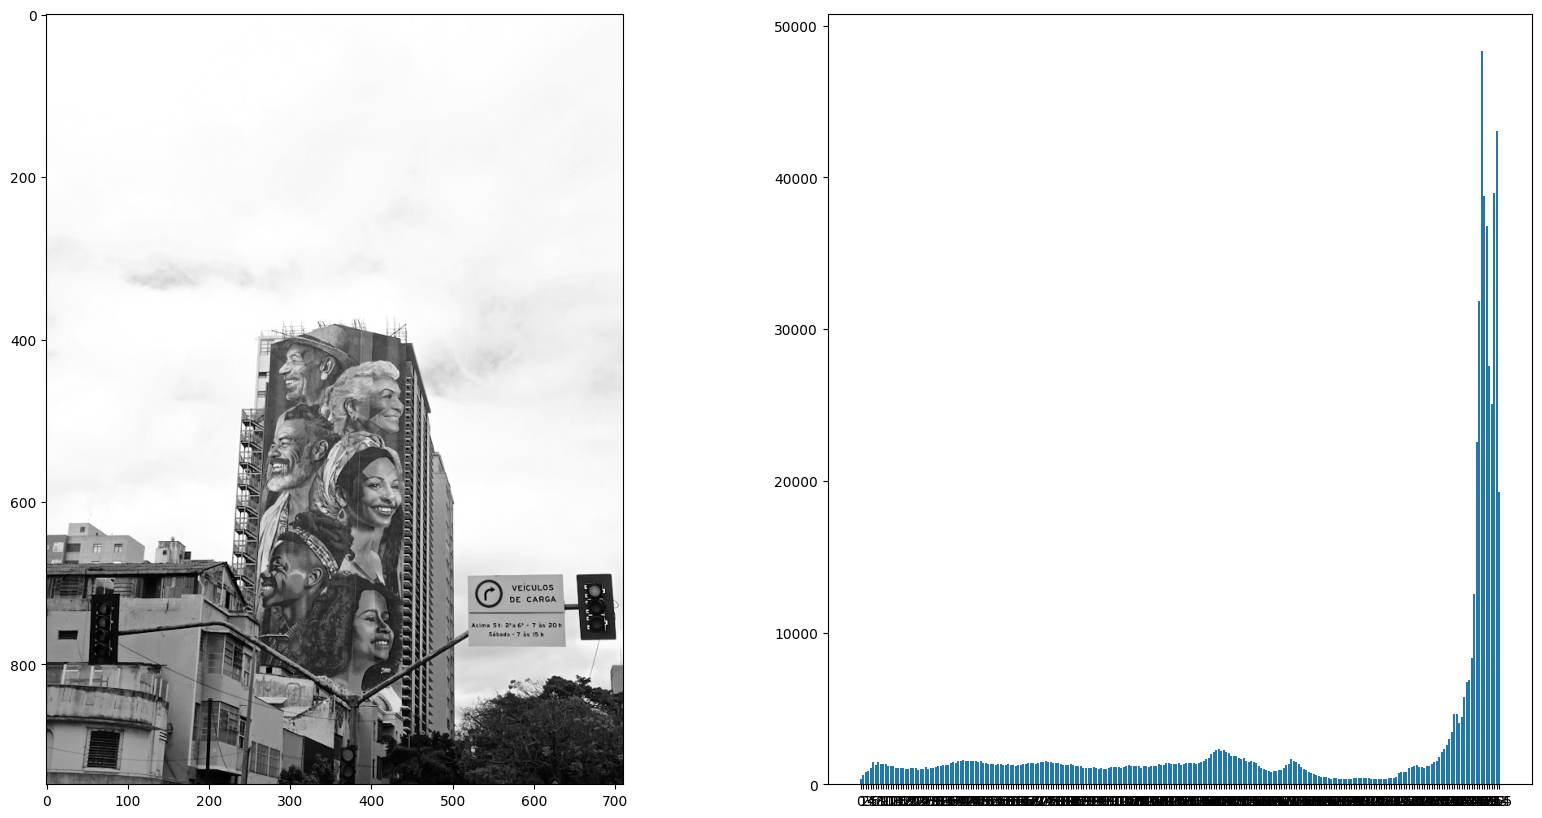

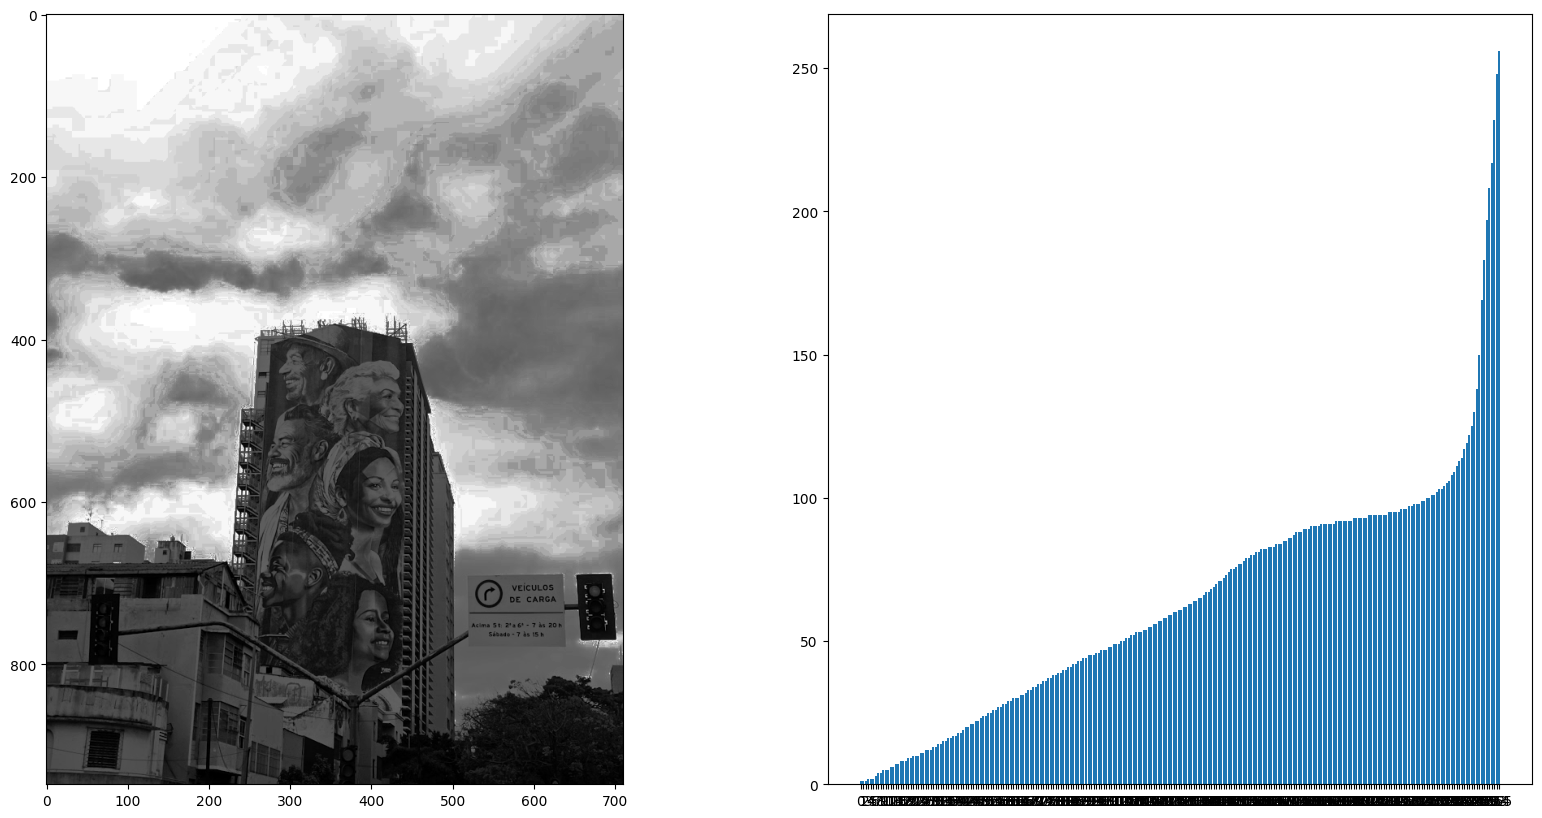

In [40]:
# Função para calcular a probabilidade de cada valor de intensidade
def get_hist_proba(hist, n_pixels):
    hist_proba = {}
    for i in range(0, 256):
        hist_proba[str(i)] = hist[str(i)] / n_pixels
    
    return hist_proba

# Função para calcular a probabilidade acumulada de cada valor de intensidade
def get_accumulated_proba(hist_proba): 
    acc_proba = {}
    sum_proba = 0
    
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sum_proba += hist_proba[str(i - 1)]
            
        acc_proba[str(i)] = hist_proba[str(i)] + sum_proba
    return acc_proba

# Função para calcular o novo valor de intensidade de cada pixel
def get_new_gray_value(acc_proba):
    new_gray_value = {}
    
    for i in range(0, 256):
        new_gray_value[str(i)] = np.ceil(acc_proba[str(i)] * 255)
    return new_gray_value

# Função para equalizar o histograma
def equalize_hist(img, new_gray_value):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = new_gray_value[str(int(img[row][column]))]     
    return img

n_pixels = grayscale_img.shape[0] * grayscale_img.shape[1]
hist_proba = get_hist_proba(histogram, n_pixels)
accumulated_proba = get_accumulated_proba(hist_proba)
new_gray_value = get_new_gray_value(accumulated_proba)
eq_img = equalize_hist(grayscale_img.copy(), new_gray_value)

plot_hist(histogram, grayscale_img)   # Histograma da imagem original
plot_hist(new_gray_value, eq_img)     # Histograma da imagem equalizada

Em uma imagem em escala de cinza, o histograma representa a distribuição de intensidades de pixels. A equalização de histograma busca esticar a distribuição dessas intensidades ao longo de todo o espectro, resultando em uma imagem com um histograma mais uniforme. Podemos perceber que o resultado da equalização na imagem selecionada resultou em um borrão não muito nítido das núvens que se encontravam ao fundo da foto, resultado do escurecimento dela. A foto foi escurecida como resultado da redistribuição da intensidade dos pixels nos diferentes níveis de intensidade.

## Exercício 8
8. Escolha duas imagens em tons de cinza sobre as quais serão testados diferentes métodos 
abordados durante a disciplina de PDI: a) uma imagem "rica em detalhes" tal como uma 
paisagem, rostos humanos etc (referenciada daqui em diante como IMAG1); b) uma imagem 
com predomínio de formas "artificiais", tal como um escritório vazio com móveis, pinturas 
contendo formas geométricas, cartazes com dígitos/letras (referenciada daqui em diante como 
IMAG2).<br>

E) Aplique o filtro de mediana (ver slides Cap. 5) a IMAG1 para dois tamanhos distintos 
de máscara. Comente os resultados.<br>
F) Aplique o filtro de mediana a IMAG2 para dois tamanhos distintos de máscara. 
Comente os resultados.<br>
G) Aplique o filtro de máximo (ver slides Cap. 5) a IMAG1 para dois tamanhos distintos 
de máscara. Comente os resultados.<br>
H) Aplique o filtro de máximo a IMAG2 para dois tamanhos distintos de máscara. 
Comente os resultados

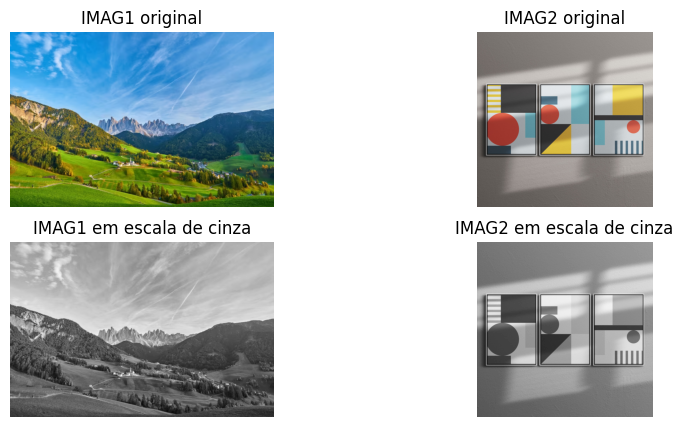

In [54]:
# Imagens escolhidas:
IMAG1 = cv2.imread('img/IMAG1.png')
IMAG2 = cv2.imread('img/IMAG2.jpg')

# Exibição da imagem original
plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
plt.title('IMAG1 original')
plt.imshow(cv2.cvtColor(IMAG1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(2,2,2)
plt.title('IMAG2 original')
plt.imshow(cv2.cvtColor(IMAG2, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Conversão RGB para Grayscale
R = IMAG1[:,:,0]  # matriz correspondente à componente RED
G = IMAG1[:,:,1]  # matriz correspondente à componente GREEN
B = IMAG1[:,:,2]  # matriz correspondente à componente BLUE

R_ = IMAG2[:,:,0]  # matriz correspondente à componente RED
G_ = IMAG2[:,:,1]  # matriz correspondente à componente GREEN
B_ = IMAG2[:,:,2]  # matriz correspondente à componente BLUE

IMAG1_GRAY = 0.299 * R + 0.587 * G + 0.114 * B
IMAG2_GRAY = 0.299 * R_ + 0.587 * G_ + 0.114 * B_

# Exibição da imagem em escala de cinza
plt.subplot(2,2,3)
plt.title('IMAG1 em escala de cinza')
plt.imshow(IMAG1_GRAY, cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.title('IMAG2 em escala de cinza')
plt.imshow(IMAG2_GRAY, cmap='gray')
plt.axis('off')

plt.show()

A) Aplique um filtro espacial de suavização (ver slides Cap. 3) - e.g.: filtro média, média 
ponderada ou gaussiano - a IMAG1 para dois tamanhos distintos de máscara. 
Comente os resultados.<br>

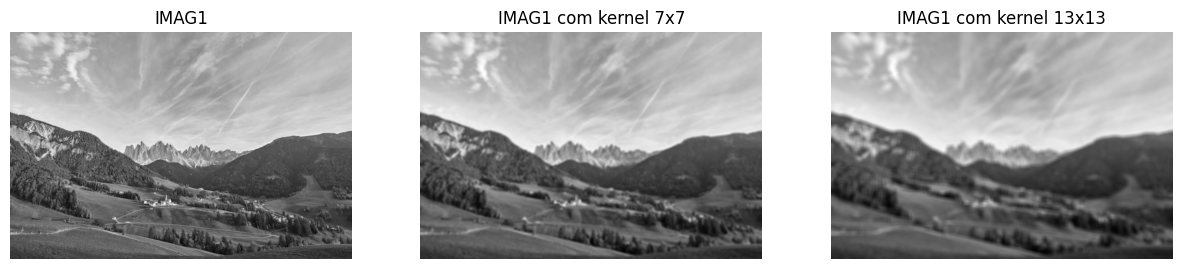

In [63]:
def filtro_media(img, tamanho_mascara):
    if tamanho_mascara % 2 == 0:
        raise ValueError("O tamanho do kernel deve ser ímpar.") # tratamento de erro
    mascara = np.ones((tamanho_mascara, tamanho_mascara), np.float32) / (tamanho_mascara**2)

    # Aplicar a convolução da imagem com a máscara
    img_suavizada = cv2.filter2D(img, -1, mascara)
    return img_suavizada

imagem_suavizada_7 = filtro_media(IMAG1_GRAY, 7)
imagem_suavizada_13 = filtro_media(IMAG1_GRAY, 13)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('IMAG1')
plt.imshow(IMAG1_GRAY, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('IMAG1 com kernel 7x7')
plt.imshow(imagem_suavizada_7, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('IMAG1 com kernel 13x13')
plt.imshow(imagem_suavizada_13, cmap='gray')
plt.axis('off')
plt.show()

O filtro de suavização de média envolve a aplicação de uma máscara de média ponderada sobre a imagem original. De forma geral, o que ocorre é o borramento da imagem, eliminando pequenos detalhes da foto. No caso da IMAG1 escolhida, pode-se perceber que as árvores e a cidade ficam cada vez mais imperceptíveis à medida que é aumentado o tamanho da máscara.

B) Aplique um filtro espacial de suavização a IMAG2 para dois tamanhos distintos de 
máscara. Comente os resultados.<br>

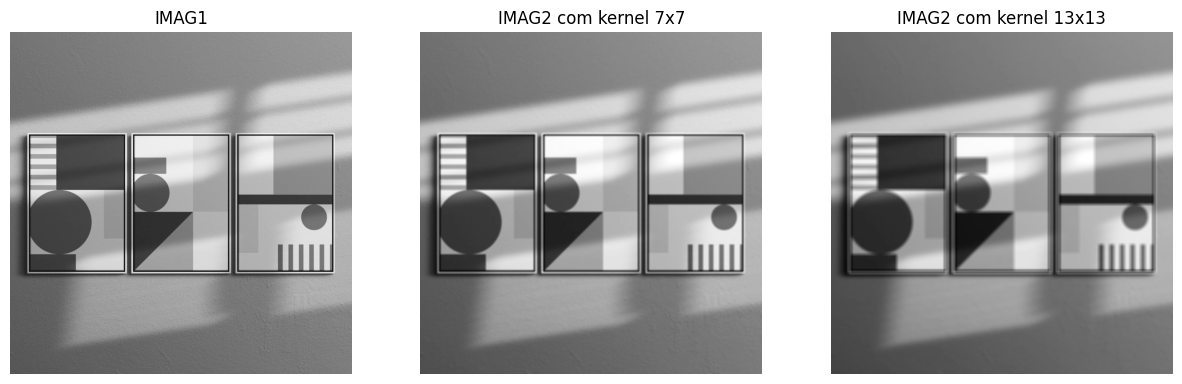

In [65]:
imagem_suavizada_7 = filtro_media(IMAG2_GRAY, 7)
imagem_suavizada_13 = filtro_media(IMAG2_GRAY, 13)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('IMAG1')
plt.imshow(IMAG2_GRAY, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('IMAG2 com kernel 7x7')
plt.imshow(imagem_suavizada_7, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('IMAG2 com kernel 13x13')
plt.imshow(imagem_suavizada_13, cmap='gray')
plt.axis('off')
plt.show()

Diferentemente do teste com IMAG1 podemos perceber que o filtro de suavização é melhor para filtrar detalhes pequenos nas imagens. Ao aplicá-lo à IMAG2, que possui formas maiores e mais geometricas, o aumento do tamanho da máscara teve um efeito menor sobre o reconhecimento da imagem original, sendo mais fácil detectar as formas borradas.

C) Empregando o Laplaciano, obtenha uma versão aguçada da IMAG1 (ver slides 38-41 
do Cap. 3, parte 4). Comente os resultados.<br>

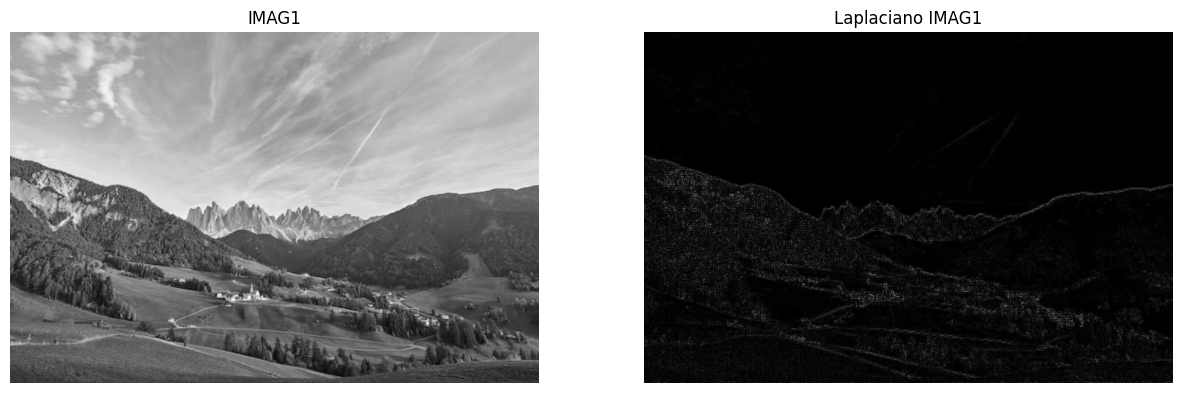

In [74]:
def laplaciano(imagem_gray):
    # Definir o kernel Laplaciano
    kernel_laplaciano = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]])

    laplacian = cv2.filter2D(imagem_gray, cv2.CV_64F, kernel_laplaciano)
    laplacian = np.uint8(np.abs(laplacian))
    return laplacian

IMAG1_LAPLACIANO = laplaciano(IMAG1_GRAY)

plt.figure(figsize=(15, 5)), plt.subplot(1,2,1), plt.title('IMAG1'), plt.axis('off'), plt.imshow(IMAG1_GRAY, cmap='gray')
plt.subplot(1,2,2), plt.title('Laplaciano IMAG1'), plt.axis('off'), plt.imshow(IMAG1_LAPLACIANO, cmap='gray') 
plt.show()

Ao aplicar o Laplaciano em IMAG1 podemos obter como resultado uma imagem contendo principalmente os contornos dos objetos contidos na imagem. Tais contornos são caracterizados por uma diferença entre níveis de intensidade ao redor do pixel analizado. Dessa forma, foi possível salientar os contornos da montanha e os pontilhados representando as árvores da paisagem.

D) Realize a mesma operação descrita na letra c, porém para a IMAG2. Comente os 
resultados.<br>

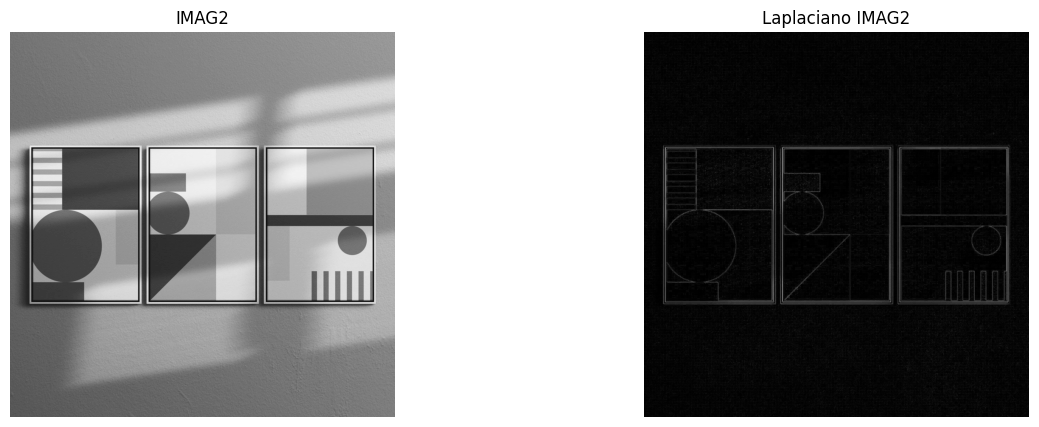

In [75]:
IMAG2_LAPLACIANO = laplaciano(IMAG2_GRAY)

plt.figure(figsize=(15, 5)), plt.subplot(1,2,1), plt.title('IMAG2'), plt.axis('off'), plt.imshow(IMAG2_GRAY, cmap='gray')
plt.subplot(1,2,2), plt.title('Laplaciano IMAG2'), plt.axis('off'), plt.imshow(IMAG2_LAPLACIANO, cmap='gray') 
plt.show()

Da mesma forma que no exercício anterior, ao aplicar o Laplaciano sobre IMAG2 foi possível obter uma imagem aguçada realçando os contornos da figura. No caso específico, podemos obter o contor das formas geométricas do quadro. É perceptível que este filtro funciona melhor em imagens com formas geométricas mais bem definidas.